In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.plotting.backend = "plotly"

In [2]:
sales1 = pd.read_pickle("../Data/total_sales_09-10_cleaned.pkl")
sales2 = pd.read_pickle("../Data/total_sales_10-11_cleaned.pkl")

In [3]:
sales1.head()

,date,weekday,hour,total_amount
0,2009-12-01,1,7,651.10
1,2009-12-01,1,9,4597.93
2,2009-12-01,1,10,4238.66
3,2009-12-01,1,11,4597.01
4,2009-12-01,1,12,8238.81


In [4]:
sales2.head()

,date,weekday,hour,total_amount
0,2010-12-01,2,8,527.95
1,2010-12-01,2,9,7356.39
2,2010-12-01,2,10,4877.56
3,2010-12-01,2,11,4041.56
4,2010-12-01,2,12,7447.92


In [5]:
sales1['date'] = pd.to_datetime(sales1['date'])
sales2['date'] = pd.to_datetime(sales2['date'])

In [6]:
sales1 = sales1[sales1['date'] >= '2010-01-01']
sales2 = sales2[sales2['date'] <= '2010-12-31']

In [7]:
sales = pd.concat([sales1, sales2], axis=0)
sales = sales.reset_index()
sales = sales.drop(columns=['index'])
sales['month'] = sales['date'].dt.month
sales = sales[['date', 'month', 'weekday','hour', 'total_amount']]
sales

,date,month,weekday,hour,total_amount
0,2010-01-04,1,0,9,45.00
1,2010-01-04,1,0,10,554.58
2,2010-01-04,1,0,11,230.90
3,2010-01-04,1,0,12,2705.35
4,2010-01-04,1,0,13,7228.35
...,...,...,...,...,...
2879,2010-12-23,12,3,11,940.84
2880,2010-12-23,12,3,12,133.97
2881,2010-12-23,12,3,14,911.67
2882,2010-12-23,12,3,15,975.72


# Day to Day Analysis

In [8]:
data = sales.copy()
data = data.drop(columns = ['hour','weekday','month'])

In [9]:
data = data.groupby('date').sum().reset_index()

In [10]:
data

,date,total_amount
0,2010-01-04,13450.54
1,2010-01-05,19136.14
2,2010-01-06,8740.69
3,2010-01-07,24232.71
4,2010-01-08,24270.93
...,...,...
293,2010-12-19,6536.42
294,2010-12-20,16546.33
295,2010-12-21,5825.53
296,2010-12-22,4175.40


<Figure size 1000x500 with 0 Axes>

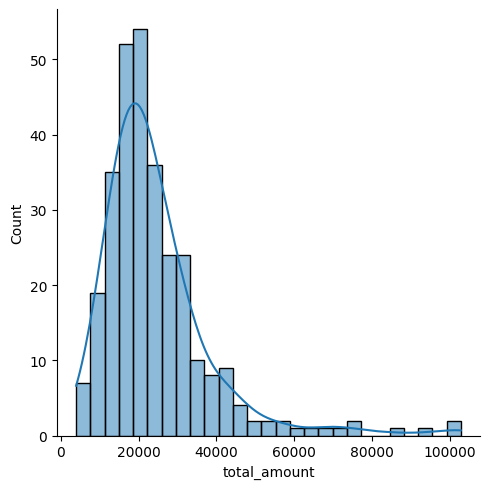

In [11]:
plt.figure(figsize=(10,5))
sns.displot(data['total_amount'], kde=True)
plt.show()

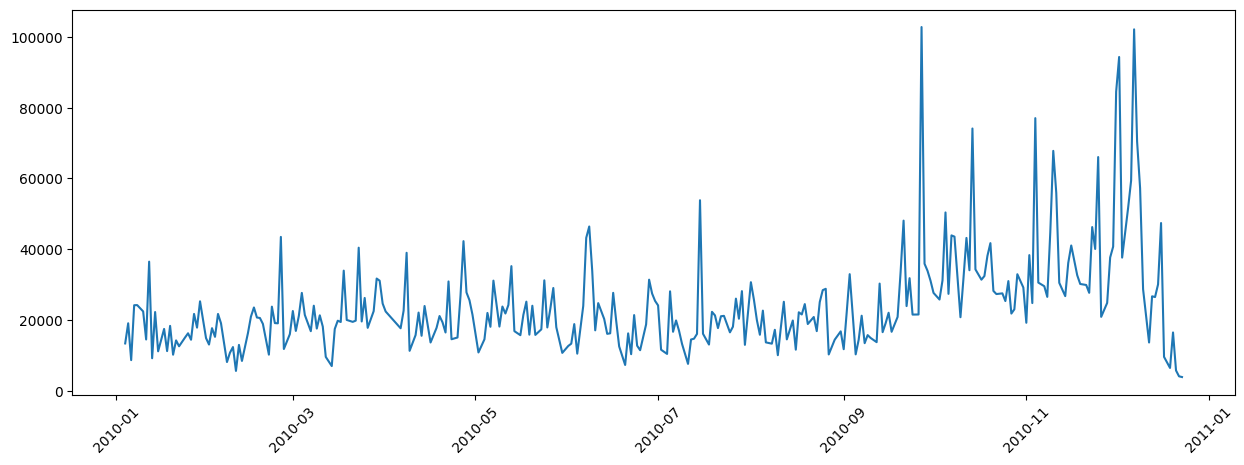

In [12]:
plt.figure(figsize=(15,5))
plt.plot(data['date'], data['total_amount'])
plt.xticks(rotation=45)
plt.show()


<Figure size 2000x1000 with 0 Axes>

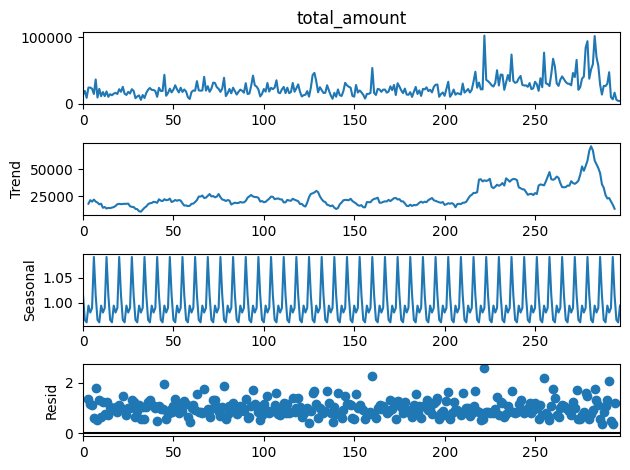

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(20,10))
decomposition = seasonal_decompose(data['total_amount'], 
                                   model='multiplicative', 
                                   period=7)
decomposition.plot();


In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


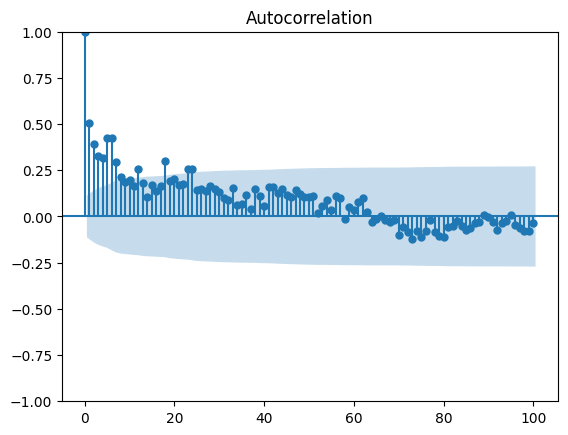

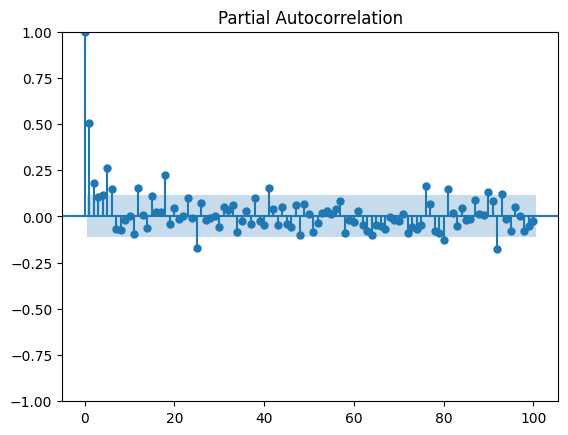

In [15]:
plot_acf(data['total_amount'], lags=100)
plot_pacf(data['total_amount'], lags=100)
plt.show()

# Weekday Analysis

In [16]:
sales1

,date,weekday,hour,total_amount
206,2010-01-04,0,9,45.00
207,2010-01-04,0,10,554.58
208,2010-01-04,0,11,230.90
209,2010-01-04,0,12,2705.35
210,2010-01-04,0,13,7228.35
...,...,...,...,...
2905,2010-12-09,3,16,2164.01
2906,2010-12-09,3,17,443.77
2907,2010-12-09,3,18,418.40
2908,2010-12-09,3,19,729.74


In [17]:
data = sales.copy()
data.drop(columns = ['date','hour'], inplace = True)

In [18]:
data = data.groupby('weekday').sum().reset_index()

In [19]:
import calendar

for i in range(7):
    data['weekday'][i] = calendar.day_name[i]

/var/folders/f8/mb2zprsj5wj1n9ygh0fcr3nw0000gn/T/ipykernel_71867/2220105524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weekday'][i] = calendar.day_name[i]


In [20]:
data

,weekday,month,total_amount
0,Monday,3034,1201408.474
1,Tuesday,3418,1379674.831
2,Wednesday,3285,1260624.953
3,Thursday,4240,1569053.192
4,Friday,3032,977680.962
5,Saturday,2248,911760.501


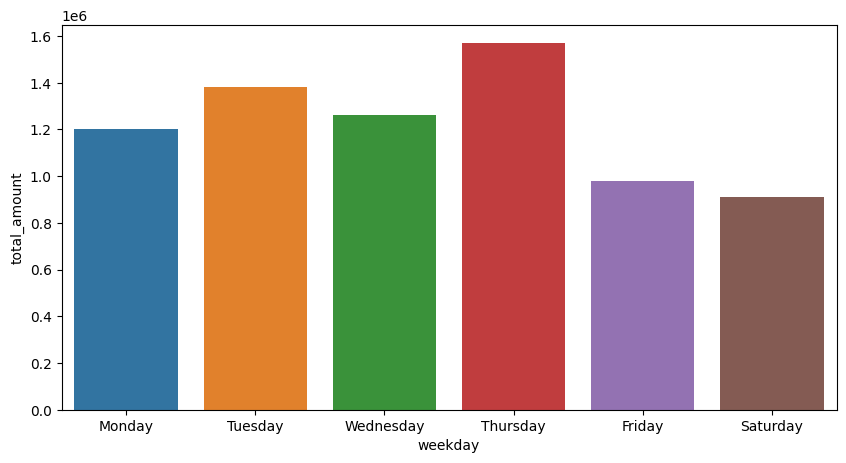

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['weekday'],y=data['total_amount'])
plt.show()

# Month Analysis